## Preprocessing data

[Dataset](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/smoking.csv")
# remove an id column
data.drop(data.filter(regex="ID"),axis=1, inplace=True)
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [16]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "height(cm)", "weight(kg)", "waist(cm)", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "systolic", "relaxation", "fasting blood sugar", "Cholesterol", "triglyceride", "HDL", "LDL", "hemoglobin", "Urine protein", "serum creatinine", "AST", "ALT", "Gtp", "dental caries"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["gender", "oral", "tartar"])
)

# create X and y value
X = data.drop("smoking", axis = 1)
y = data["smoking"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the column transformer
ct.fit(X_train)

# transform train and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [17]:
X_train_normal[0]

array([0.61538462, 0.54545455, 0.23809524, 0.32051282, 0.09183673,
       0.09183673, 0.        , 0.        , 0.14792899, 0.28301887,
       0.12997347, 0.28205128, 0.0554995 , 0.06677524, 0.0570199 ,
       0.56790123, 0.        , 0.05217391, 0.01532567, 0.00686577,
       0.01603206, 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        ])

In [18]:
X_test_normal[0]

array([0.38461538, 0.45454545, 0.23809524, 0.25641026, 0.09183673,
       0.04081633, 0.        , 0.        , 0.23668639, 0.1509434 ,
       0.06896552, 0.27179487, 0.0716448 , 0.07491857, 0.05056482,
       0.39506173, 0.        , 0.06086957, 0.00842912, 0.0030896 ,
       0.01002004, 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        ])

## Build a neural network

In [19]:
# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_1.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# create a learning_rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_1 = model_1.fit(X_train_normal, y_train, callbacks = [lr_scheduler], epochs = 100)

Epoch 1/100
1393/1393 [==============================] - 7s 4ms/step - loss: 0.6611 - accuracy: 0.6283 - lr: 1.0000e-04
Epoch 2/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.5772 - accuracy: 0.6344 - lr: 1.1220e-04
Epoch 3/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.5036 - accuracy: 0.7114 - lr: 1.2589e-04
Epoch 4/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4920 - accuracy: 0.7172 - lr: 1.4125e-04
Epoch 5/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.7214 - lr: 1.5849e-04
Epoch 6/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4880 - accuracy: 0.7233 - lr: 1.7783e-04
Epoch 7/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4861 - accuracy: 0.7249 - lr: 1.9953e-04
Epoch 8/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4840 - accuracy: 0.7299 - lr: 2.2387e-04
Epoch 9/100
1393/1393 [=================

### Try to find the best learning rate

Text(0.5, 1.0, 'Learning rate vs Loss')

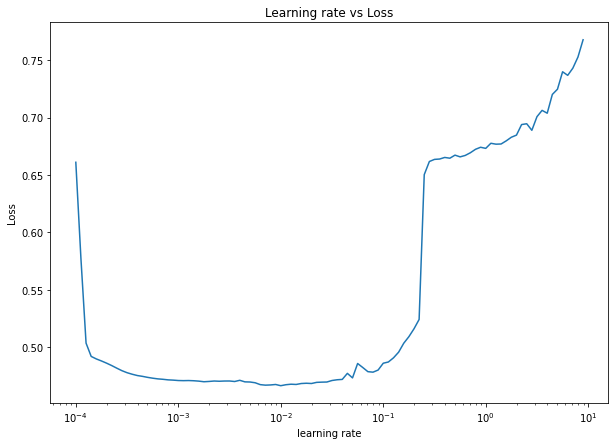

In [20]:
# plot the learning rate vs the loss to find where the loss decrease fastest (penurunan loss tercepat ada di learning rate yang mana?)
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [22]:
# try a higher ideal learning rate with the same model as before

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_2.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                 metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
1393/1393 [==============================] - 9s 3ms/step - loss: 0.4933 - accuracy: 0.7201
Epoch 2/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4766 - accuracy: 0.7393
Epoch 3/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4712 - accuracy: 0.7471
Epoch 4/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4695 - accuracy: 0.7485
Epoch 5/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4676 - accuracy: 0.7503
Epoch 6/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4670 - accuracy: 0.7516
Epoch 7/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4669 - accuracy: 0.7505
Epoch 8/100
1393/1393 [==============================] - 5s 4ms/step - loss: 0.4654 - accuracy: 0.7525
Epoch 9/100
1393/1393 [==============================] - 5s 3ms/step - loss: 0.4662 - accuracy: 0.7510
Epoch 10/100
1393/1393 [==============================] - 5s 4ms/step - l

In [23]:
model_2.evaluate(X_test_normal, y_test)

349/349 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7519


[0.4667673707008362, 0.7518628239631653]

## Confusion Matrix

In [24]:
# make predictions
y_preds = model_2.predict(X_test_normal)
y_preds

349/349 [==============================] - 1s 1ms/step


array([[0.04712776],
       [0.08914553],
       [0.7868796 ],
       ...,
       [0.03230576],
       [0.3875434 ],
       [0.69739574]], dtype=float32)

In [25]:
# convert to binary format
y_preds = tf.round(y_preds)

In [26]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[5528, 1499],
       [1265, 2847]])

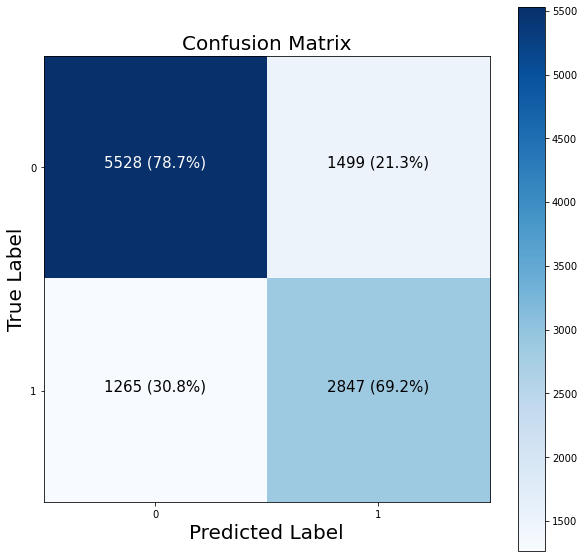

In [27]:
# prettify the confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# prettify it
fig, ax = plt.subplots(figsize = figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes 
classes = False
labels = np.arange(cm.shape[0])

# label the axes
ax.set(title = "Confusion Matrix", 
       xlabel = "Predicted Label", 
       ylabel = "True Label", 
       xticks = np.arange(n_classes), 
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)